**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho

---

Aluna(o): Wendel Marques de Jesus Souza

---

Grupo (F)

---

Papel no grupo: Engenheiro de Conhecimento

---

##Especificação do problema : Incerteza

As doenças cardiovasculares são a maior causa de morte no planeta. Milhões de pessoas morrem anualmente por problemas cardíacos.  O assunto tem sido objeto de pesquisa tanto na academia quanto na indústria. Por exemplo, [Saheki e outros](http://sites.poli.usp.br/p/fabio.cozman/Publications/Article/saheki-sharovsky-cozman-coupe-enia2003.pdf) desenvolveram uma rede bayesiana para tratar do assunto.

A partir do estudo de trabalhos já desenvolvidos e da [base de dados](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) disponibilizada, construa uma rede bayesiana que permita fazer predições de óbitos por essas doenças.

**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. O grupo deve dividir o trabalho de forma que um dos membros implemente uma análise exploratória dos dados e o outro se encarregue de implementar o modelo, o qual deve ser definido em conjunto pelo grupo.


## Instruções de uso




Para que seja possível utilizar o modelo, antes de tudo deve-se criar uma conta do Google ($accounts.google.com$). Em seguida, se necessário, salve o arquivo $.ipynb$ no Google Drive. Após isso, abra o arquivo com Google Colaboratory.


Siga os passos abaixo:

* Bibliotecas necessárias: Excute a célula dessa seção para carregar as bibliotecas necessárias.

* Upload de arquivo - Realize o $upload$ da base de dados para o sistema de arquivos local. Execute a célula em questão e clique em *Escolher arquivos*. Em seguida selecione a base de dados. 

* Preparação dos dados - Todas conversões e limpeza são realizadas nessa etapa. Gera os conjuntos de dados para a implementação do modelo.

* Implementação do modelo - Etapa em que a bayesiana é criada.

* Arquitetura da rede - Execute as células dessa seção para obter informações sobre a arquitetura da rede. 


##Informações gerais

###Balanceamento

Cogitamos o uso da técnica de Random Undersampling para realizar o desbalanceamento das classes. A técnica exclui aleatoriamente exemplos da classe majoritária. Apesar da base já ser pequena, cogitamos seu uso pelo fato do SMOTE gera amostras sintéticas fora do padrão. Além disso, o modelo Naive Bayes lida muito bem com uma base de dados pequena.

Considerando isso e os resultados da análise exploratória do dados, testamos o seu uso, mas os resultado não foram satisfatórios. 

0    203
1     96
Name: DEATH_EVENT, dtype: int64





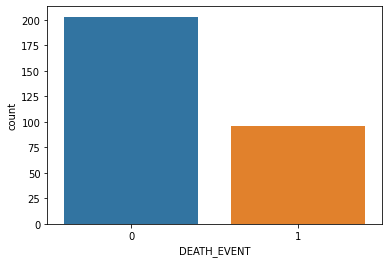

In [ ]:
df_exemplos = pd.read_csv('heart_failure_clinical_records_dataset.csv')
y = df_exemplos['DEATH_EVENT']
print(pd.Series(y).value_counts())
print('\n\n')
 
#Plota a distribuição da classe target
sns.countplot(y)

In [ ]:
#### Este código seria responsavel realizar o balancemento das classes

# instantiating the random undersampler
# rus = RandomUnderSampler() 
# # resampling X, y
# x_train, y_train = rus.fit_sample(x_train, y_train)

### Discretização

A discretização fornece uma maneira de particionar recursos contínuos em valores discretos. 

Utilizamos o [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) para dividir os dados contínuos em intervalos.  

As manipulações referentes ao processo de discretização foram implementadas com base no trabalho [Comparing performance of 13 Classifiers | F1-score](https://www.kaggle.com/para24/comparing-performance-of-13-classifiers-f1-score). As funções to_categorical e return_categoricals, que são responsáveis por detectar colunas do tipo "category" e converter colunas para esse mesmo tipo, foram utilizadas na integra.
  
 

### Modelo Utilizado



O classificador Naive Bayes categórico é adequado para classificação com recursos discretos que são categoricamente distribuídos. As categorias de cada recurso são tiradas de uma distribuição categórica. Ele é um classificador ingênuo para dados distribuídos categoricamente. Ele pressupõe que cada recurso, que é descrito pelo índice, tem sua própria distribuição categórica.

Como a maioria dos recursos são categóricos e seguem uma distribuição categórica, usaremos o NB Categórico ([CategoricalNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB)). Os dados continuos serão discretizados.

### Seleção de atributos


A suposição fundamental feita por Naive Bayes em relação aos dados é a independência condicional de classe dos recursos. Nesse sentido, optamos por utilizar todos os recursos disponíveis. 

##Bibliotecas necessárias

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import CategoricalNB, GaussianNB 
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_roc_curve
 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Upload de arquivo
Realize o upload da base de dados para o sistema de arquivos local. O caminho é automaticamente configurado para o arquivo enviado.

In [ ]:
#Carrega os dados para a plataforma
uploaded = files.upload()
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


##Preparação dos dados
######Limpeza, seleção de amostras, balanceamento e discretização

In [ ]:
#Converte as colunas para o tipo de dados "category"
def to_categorical(columns, df):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

#Retorna uma lista de colunas que têm menos ou igual ao número de limite de níveis categóricos únicos
def return_categoricals(df, threshold):
    return list(filter(lambda c: c if len(df[c].unique()) <= threshold else None,
                       df.columns))

In [ ]:
#Carrega os dados
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#Eliminavalores missing (caso seja necessário)
df.dropna(inplace=True)

#Remove de duplicates, se necessário
df.drop_duplicates(keep=False, inplace=True)

#Recupera uma lista de colunas que possuem um número máximo de 5 níveis categóricos únicos
to_cast = return_categoricals(df, threshold=3)
#Converte as colunas para o tipo de dados "category"
df = to_categorical(to_cast, df)

#Separa a váriavel target das demais váriaveis 
x = df.iloc[:, :-1]
y = df['DEATH_EVENT']

#Construção de uma lista de colunas do tipo "category" e "Numeric", respectivamente
categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

#Inicio do processo de discretização dos dados
##Criação de um Pipeline de transformações 
numeric_trans_nb = Pipeline(steps=[('kbn', KBinsDiscretizer(n_bins=3, encode='ordinal'))])
categorical_trans_nb = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.int64))])~

#Separação de dados treino e dados de teste
#Proporção de 25% para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)

#Transformador de colunas
preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', numeric_trans_nb, numeric_columns),
        ('cat', categorical_trans_nb, categorical_columns)],
    remainder='passthrough')

#Aplicação do transformador de colunas
x_train = preprocessor_nb.fit_transform(x_train)
x_test = preprocessor_nb.transform(x_test) 



##Implementação

======================= RELATÓRIO DE CLASSIFICAÇÃO =======================

Tamanho do Treino: 224 amostras
Tamanho do Teste: 75 amostras


Taxa de sucesso: 82.67%

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        51
           1       0.82      0.58      0.68        24

    accuracy                           0.83        75
   macro avg       0.83      0.76      0.78        75
weighted avg       0.83      0.83      0.82        75





======================= PLOTS =======================




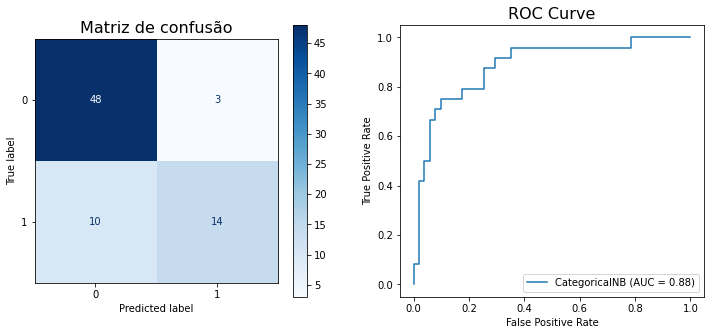

In [ ]:
#Criando objeto CategoricalNB
predict_cardio = CategoricalNB()

#Treina o modelo  
predict_cardio.fit(x_train,y_train)

#Executa a predição no conjunto de teste
y_test_pred = predict_cardio.predict(x_test)

#Cálculo de métricas de avaliação
metricas = accuracy_score(y_test,y_test_pred)

#Exibe  métricas de avaliação
print("======================= RELATÓRIO DE CLASSIFICAÇÃO =======================\n")
print(f"Tamanho do Treino: {x_train.shape[0]} amostras")
print(f"Tamanho do Teste: {x_test.shape[0]} amostras\n")
print(f"\nTaxa de sucesso: {round(metricas*100,2)}%\n")
print(classification_report(y_test,y_test_pred))
print("\n\n\n")

#Realiza plotagens 
print("======================= PLOTS =======================\n\n")
fig, ax = plt.subplots(1,2,figsize=(12,5))
plot_confusion_matrix(predict_cardio,x_test,y_test,cmap='Blues',ax=ax[0])
ax[0].set_title("Matriz de confusão",fontsize=16)
ax[0].set_xticks([0,0], ["Heart Not Failed","Heart Fail"])
ax[0].set_yticks([0,1], ["Heart Not Failed","Heart Fail"])
ax[0].grid(False)

plot_roc_curve(predict_cardio,x_test,y_test,ax=ax[1])
ax[1].set_title("ROC Curve",fontsize=16)
plt.show()


##Resultados e discussão

###Resultados:

A matriz de confusão relaciona a classe esperada com a classe obtida pelo modelo, permitindo a análise de erro. Classe 1 significa "óbito" e classe 0 significa "não óbito". 

* Os falsos positivos (3 classificações), representa que o algoritmo concluiu que 3 pacientes iriam óbito, sendo que a classificão correta seria de que eles não iriam a óbito. 

* Os falsos negativos (10 classificações), representa que o algoritmo concluiu que 3 pacientes não iriam óbito, sendo que a classificaão correta seria de que eles iriam a óbito. 

* accuracy: a matriz de confussão indica que a classificação obteve uma taxa de sucesso igual a 82.67%.

* precision: quando ele prevê um "não óbito", ele está certo em 83% dos casos; quando ele prevê um "óbito", ele está certo em 82% dos casos. 

* recall: quando a resposta da classe é "não óbito", ele classificar corrretamente em 94% dos casos; quando a resposta da classe é "óbito", ele classifica corretamente 58% dos casos. 

* A curva AUC - ROC é uma medida de desempenho para os problemas de classificação. ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Quanto mais alta a AUC, melhor o modelo distingue entre pacientes com que iriam a óbito e os pacientes que não iriam a óbito.  Uma AUC próximo de 88% significa que o modelo tem uma boa medida de separabilidade.

##Discussão:
Embora recall de 58% é preocupante, uma vez que um sistema de predições de óbitos deva detectar quem tem maior probabilidade de falecer para que medidas de intervenção tomadas. Apesar disso, uma precisão de 82% é um bom valor, tendo em vista que 82% vidas poderiam ser salvas.


##Arquitetura da rede

In [ ]:
#Exibe a probabilidade das categorias, considerando o respectivo recurso e classe P(x_i|y), onde xi é o recurso e y é a classe

columns_name = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	
                'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking'	,'time']
count = 0
count_2 = 0

for amostras in predict_cardio.feature_log_prob_ :
  print('=============== '+columns_name[count]+' ===============\n')
  print('\tClasse "Não óbito (0)":')

  count_2 = 0
  for aux in amostras[0]:
    print(f'\t\t\t{count_2}: {round(np.exp(aux)*100,2)}%')
    count_2+=1


  print('\n\tClasse "Óbito (1)":')
  count_2 = 0
  for aux in amostras[1]:
    print(f'\t\t\t{count_2}: {round(np.exp(aux)*100,2)}%')
    count_2+=1

  count+=1
  print('\n')

=============== age ===============

	Classe "Não óbito (0)":
			0: 38.06%
			1: 29.68%
			2: 32.26%

	Classe "Óbito (1)":
			0: 24.0%
			1: 29.33%
			2: 46.67%


=============== anaemia ===============

	Classe "Não óbito (0)":
			0: 35.48%
			1: 29.03%
			2: 35.48%

	Classe "Óbito (1)":
			0: 29.33%
			1: 34.67%
			2: 36.0%


=============== creatinine_phosphokinase ===============

	Classe "Não óbito (0)":
			0: 20.0%
			1: 33.55%
			2: 46.45%

	Classe "Óbito (1)":
			0: 58.67%
			1: 21.33%
			2: 20.0%


=============== diabetes ===============

	Classe "Não óbito (0)":
			0: 30.32%
			1: 34.84%
			2: 34.84%

	Classe "Óbito (1)":
			0: 40.0%
			1: 29.33%
			2: 30.67%


=============== ejection_fraction ===============

	Classe "Não óbito (0)":
			0: 35.48%
			1: 35.48%
			2: 29.03%

	Classe "Óbito (1)":
			0: 9.33%
			1: 28.0%
			2: 62.67%


=============== high_blood_pressure ===============

	Classe "Não óbito (0)":
			0: 20.65%
			1: 33.55%
			2: 45.81%

	Classe "Óbito (1)":
			0

In [ ]:
#Exibe o número de amostras encontradas para cada classe e categoria de recurso específico
count = 0
count_2 = 0
for amostras in predict_cardio.category_count_:
  print('=============== ' + columns_name[count] +' ===============\n')
  print('\tClasse "Não óbito (0)":')

  count_2 = 0
  for aux in amostras[0]:
    print(f'\t\t{count_2}: {int(aux)} amostras')
    count_2+=1


  print('\n\tClasse "Óbito (1)":')
  count_2 = 0
  for aux in amostras[1]:
    print(f'\t\t{count_2}: {int(aux)} amostras')
    count_2+=1

  count+=1
  print('\n')

=============== age ===============

	Classe "Não óbito (0)":
		0: 58 amostras
		1: 45 amostras
		2: 49 amostras

	Classe "Óbito (1)":
		0: 17 amostras
		1: 21 amostras
		2: 34 amostras


=============== anaemia ===============

	Classe "Não óbito (0)":
		0: 54 amostras
		1: 44 amostras
		2: 54 amostras

	Classe "Óbito (1)":
		0: 21 amostras
		1: 25 amostras
		2: 26 amostras


=============== creatinine_phosphokinase ===============

	Classe "Não óbito (0)":
		0: 30 amostras
		1: 51 amostras
		2: 71 amostras

	Classe "Óbito (1)":
		0: 43 amostras
		1: 15 amostras
		2: 14 amostras


=============== diabetes ===============

	Classe "Não óbito (0)":
		0: 46 amostras
		1: 53 amostras
		2: 53 amostras

	Classe "Óbito (1)":
		0: 29 amostras
		1: 21 amostras
		2: 22 amostras


=============== ejection_fraction ===============

	Classe "Não óbito (0)":
		0: 54 amostras
		1: 54 amostras
		2: 44 amostras

	Classe "Óbito (1)":
		0: 6 amostras
		1: 20 amostras
		2: 46 amostras


=============== h

In [ ]:
# Número de amostras encontradas para cada classe durante a adaptação
n_ob = predict_cardio.class_count_[0]
ob = predict_cardio.class_count_[1]

print('Número de amostras encontradas para cada classe durante a adaptação:\n')
print(f'Classe "Não óbito (0)": {n_ob}')
print(f'Classe "Óbito (1)": {ob}')

Número de amostras encontradas para cada classe durante a adaptação:

Classe "Não óbito (0)": 152.0
Classe "Óbito (1)": 72.0
